# Student Evaluation dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [3]:
data = pd.read_csv('student-mat.csv', sep = ';')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [6]:
data.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [7]:
data_encoded = pd.get_dummies(data, drop_first=True)

# Target variable: Final grade(G3)
# let's look at correlation tochoose a feature for simple regression
correlations = data_encoded.corr()['G3'].sort_values(ascending=False)
print("\nTop Correlations with G3:")
print(correlations.head(10))


Top Correlations with G3:
G3             1.000000
G2             0.904868
G1             0.801468
Medu           0.217147
higher_yes     0.182465
Fedu           0.152457
Mjob_health    0.116158
address_U      0.105756
sex_M          0.103456
paid_yes       0.101996
Name: G3, dtype: float64


In [8]:
X_simple = data_encoded[['G1']]
y = data_encoded['G3']
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [9]:
model_simple = LinearRegression()

print(type(model_simple))
print(type(model_simple.fit))
model_simple.fit(X_train, y_train)


<class 'sklearn.linear_model._base.LinearRegression'>
<class 'method'>


LinearRegression()

In [10]:
y_pred_simple = model_simple.predict(X_test)

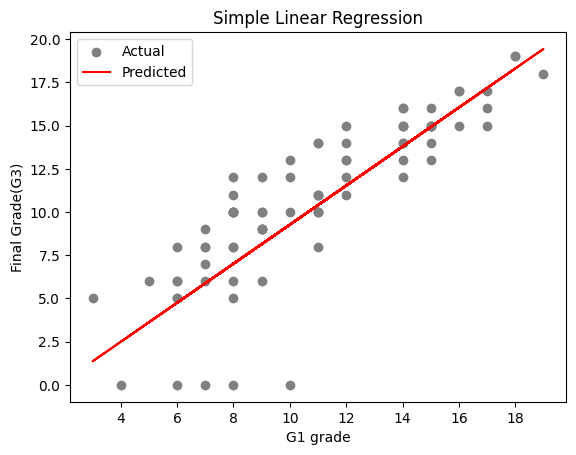

In [11]:
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', label='Predicted')
plt.xlabel('G1 grade')
plt.ylabel('Final Grade(G3)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [12]:
print("\nSimple Linear Regression")
print("Coefficient: ", model_simple.coef_[0])
print("Intercept: ", model_simple.intercept_)
print("MSE: ", mean_squared_error(y_test, y_pred_simple))
print("R^2: ", r2_score(y_test, y_pred_simple))


Simple Linear Regression
Coefficient:  1.129537345818346
Intercept:  -2.0238972462100797
MSE:  6.162673188105788
R^2:  0.6994557921500937
